<a href="https://colab.research.google.com/github/prinzessinmarlenifee/SenseCap/blob/main/test-one-session_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 📊 Vergleichs-Notebook – Augmentierung vs. Original & Modell-Vergleich

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

from google.colab import drive
drive.mount('/content/drive')

# 🔁 Verschiedene Modelle laden
o_model_path = "/content/drive/MyDrive/ML-MTB-Project/ML-Model_trained/SenseCap_Model_v42_augment_factor220250607-163310.keras"
a_model_path = "/content/drive/MyDrive/ML-MTB-Project/ML-Model_trained/SenseCap_Model_v42_augment_factor220250607-163310.keras"

model_o = load_model(o_model_path)
model_a = load_model(a_model_path)

# 📦 Validierungsdaten laden (ohne & mit Augmentierung)
# Hier als Beispiel – ersetze durch tatsächliche Datenpfade
X_val_o = np.load("/content/drive/MyDrive/mtb_project/data/X_val_original.npy")
y_val_o = np.load("/content/drive/MyDrive/mtb_project/data/y_val_original.npy")

X_val_a = np.load("/content/drive/MyDrive/mtb_project/data/X_val_augmented.npy")
y_val_a = np.load("/content/drive/MyDrive/mtb_project/data/y_val_augmented.npy")

# 📈 Modell Original (ohne Augmentierung)
y_pred_o = (model_o.predict(X_val_o) >= 0.5).astype(int).flatten()
print("\n🔍 Ohne Augmentierung")
print(classification_report(y_val_o, y_pred_o, target_names=["Not Action", "Action"]))

# 📈 Modell Augmentiert
y_pred_a = (model_a.predict(X_val_a) >= 0.5).astype(int).flatten()
print("\n🧪 Mit Augmentierung")
print(classification_report(y_val_a, y_pred_a, target_names=["Not Action", "Action"]))

# 🔍 Vergleich nebeneinander (optional visualisieren)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
cm_o = confusion_matrix(y_val_o, y_pred_o)
cm_a = confusion_matrix(y_val_a, y_pred_a)

ConfusionMatrixDisplay(cm_o, display_labels=["Not Action", "Action"]).plot(ax=axs[0], cmap="Blues")
axs[0].set_title("Ohne Augmentierung")

ConfusionMatrixDisplay(cm_a, display_labels=["Not Action", "Action"]).plot(ax=axs[1], cmap="Greens")
axs[1].set_title("Mit Augmentierung")

plt.tight_layout()
plt.show()

# 📊 Optional: weitere Modelle vergleichen (z. B. andere Architekturen)
# Einfach weitere Modelle laden und ergänzen wie oben


Mounted at /content/drive


ValueError: File not found: filepath=/content/drive/MyDrive/ML-MTB-Project/ML-Model_trained/SenseCap_Model_v42_augment_factor220250607-163310.keras. Please ensure the file is an accessible `.keras` zip file.

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from tensorflow.keras.models import load_model

#1. mount google drive and laod files
from google.colab import drive
drive.mount('/content/drive')

# 🔁 load models
o_model_path = "/content/drive/MyDrive/ML-MTB-Modell/ML-Model_trained/SenseCap_Model_v42_augment_factor220250607-163310.keras" # augment factor 2

# 🔹 1. Lade CSVs aus deinem Google Drive-Ordner
folder_path = "/content/drive/MyDrive/ML-MTB-Modell/Session_03"

def load_sensor_csv(path, timesteps, features):
    df = pd.read_csv(folder_path)
    data = df.to_numpy()
    return data.reshape((-1, timesteps, features))  # Shape: [N, T, F]

# 🔹 2. Parameter: wie viele Timesteps & Features hast du pro Sensor?
timesteps = 50  # z.B. 50 Zeitschritte
features_per_sensor = 6  # z.B. 6 Features (Acc, Gyro, Mag)

# 🔹 3. Lade Sensor-Daten
wrist = load_sensor_csv(os.path.join(folder_path, "wrist.csv"), timesteps, features_per_sensor)
head = load_sensor_csv(os.path.join(folder_path, "head.csv"), timesteps, features_per_sensor)
seat = load_sensor_csv(os.path.join(folder_path, "seat.csv"), timesteps, features_per_sensor)

# 🔹 4. Sensoren entlang der Feature-Achse (axis=2) kombinieren
X_session = np.concatenate([wrist, head, seat], axis=2)  # Shape: [N, T, F_total]

# 🔹 5. Optional: Labels laden und binär kodieren
label_path = os.path.join(folder_path, "labels.csv")
has_ground_truth = os.path.exists(label_path)

if has_ground_truth:
    labels = pd.read_csv(label_path).values.flatten()
    y_session = np.array([1 if label == "Action" else 0 for label in labels])  # Binary encoding
else:
    y_session = None

# 🔹 6. Lade das Modell
model_path = "/content/drive/MyDrive/ML-MTB-Project/ML-Model_trained/dein_modell.keras"
model = load_model(model_path)

# 🔹 7. Vorhersage
y_pred_probs = model.predict(X_session)
y_pred_binary = (y_pred_probs >= 0.5).astype(int).flatten()

# 🔹 8. Zeitstrahl darstellen
plt.figure(figsize=(16, 4))
plt.plot(y_pred_binary, label='Predicted', color='red', linestyle='--')
if has_ground_truth:
    plt.plot(y_session, label='Ground Truth', color='black')
plt.title("Prediction Timeline – CSV Session")
plt.xlabel("Window Index")
plt.ylabel("Action Detected")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/ML-MTB-Modell/Session_03'

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import csv

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

# 📁 Pfad zum Session-Ordner (anpassen)
session_folder = "/content/drive/MyDrive/ML-MTB-Modell/Session_03"

# 🔧 Parameter: wie im Training
timesteps = 60
total_features = 27  # wrist + head + seat

# 📥 CSV-Dateien einlesen
def load_sensor_data(sensor_name):
    path = os.path.join(session_folder, f"{sensor_name}.csv")
    df = pd.read_csv(path)
    return df

# Kombinieren: jede CSV enthält [samples x (timesteps * features_per_sensor)]
wrist = load_sensor_data("wrist")
head = load_sensor_data("head")
seat = load_sensor_data("seat")

import numpy as np
import pandas as pd

# Given:
timesteps = 60
total_features = 27

# Step 1: Concatenate sensor data horizontally (along columns)
X_flat = pd.concat([wrist, head, seat], axis=1).values  # shape: (num_samples, total_features)

# Step 2: Calculate total number of full windows that fit in the data
num_samples = X_flat.shape[0]
window_size = timesteps * total_features

# Calculate how many full windows we have
num_windows = num_samples // timesteps  # integer division, discard remainder

# Step 3: Cut the data to fit full windows only
cut_length = num_windows * timesteps  # total samples that fit into full windows
X_cut = X_flat[:cut_length, :]

# Step 4: Reshape the data into (num_windows, timesteps, total_features)
X_session = X_cut.reshape((num_windows, timesteps, total_features))

print(f"Reshaped data to {X_session.shape}")


# Zusammenfügen der Daten
X_flat = pd.concat([wrist, head, seat], axis=1).values
X_session = X_flat.reshape((-1, timesteps, total_features))

# 📋 Labels einlesen und encoden
labels_df = pd.read_csv(os.path.join(session_folder, "labels.csv"))
label_strings = labels_df.values.flatten()
le = LabelEncoder()
y_session_enc = le.fit_transform(label_strings)  # z.B. ['Resting', 'Pushing', ...] → [0,1,2,3]

# 📦 Modell laden
model_path = "/content/drive/MyDrive/ML-MTB-Modell/ML-Model_trained/SenseCap_Model_v42_augment_factor220250607-163310.keras" # augment factor 2
model = load_model(model_path)

# 🔮 Vorhersage
y_pred_probs = model.predict(X_session)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # für Multiclass

# 📈 Zeitstrahl zeichnen
plt.figure(figsize=(16, 5))
plt.plot(y_pred_classes, label='Predicted', linestyle='--', color='red')
plt.plot(y_session_enc, label='True Label', alpha=0.6, color='black')
plt.title("Prediction Timeline – Multiclass")
plt.xlabel("Window Index")
plt.ylabel("Class Index")
plt.legend()
plt.grid(True)
plt.show()

# 💾 Optional: Export als CSV
output_path = os.path.join(session_folder, "prediction_export.csv")
with open(output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["True_Label", "Predicted_Label"])
    for t, p in zip(label_strings, le.inverse_transform(y_pred_classes)):
        writer.writerow([t, p])
print(f"✅ Exported predictions to {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: cannot reshape array of size 761400 into shape (2115,60,27)

In [39]:
#import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import csv
import json
import re

In [41]:

# 🔁 Windowing für Labels vorbereiten
def window_labels(labels, window_size):
    y_win = []
    for i in range(0, len(labels) - window_size + 1, window_size):
        window = labels[i:i + window_size]
        if len(set(window)) == 1:
            y_win.append(window[0])  # einheitliches Label
        else:
            y_win.append("Mixed")  # oder z.B. Majorität
    return y_win



# 🔧 Parse labels from your JSON format

def parse_hot_labels(hot_path, total_frames):
    with open(hot_path, 'r') as f:
        hot = json.load(f)

    label_string = hot.get("button_presses", "")
    entries = re.findall(r'([A-Za-z]+):\s*(\d+)', label_string)

    # Aufbau: [(label, index), ...]
    entries = [(label.strip(), int(start)) for label, start in entries]

    # Sortieren nach Startzeit
    entries.sort(key=lambda x: x[1])

    # Liste initialisieren
    frame_labels = ["Unknown"] * total_frames

    # Intervalle zuweisen
    for i in range(len(entries)):
        label, start = entries[i]
        end = entries[i + 1][1] if i + 1 < len(entries) else total_frames
        for j in range(start, min(end, total_frames)):
            frame_labels[j] = label

    return frame_labels




#mount google drive
from google.colab import drive
drive.mount('/content/drive')

# 📁 Path to session folder (adjust as needed)
session_folder = "/content/drive/MyDrive/ML-MTB-Modell/Session_03"

# 🔧 Parameters (must match training)
timesteps = 60
total_features = 27  # sum of all sensor features (wrist + head + seat), 12 spalten per csv, siehe headprint unten


# 📥 Load sensor CSV data

def load_sensor_data(sensor_name):
    path = os.path.join(session_folder, f"{sensor_name}.csv")
    df = pd.read_csv(path, skiprows=1)  #skip first line because second line is header
    # Drop the first two columns (which are irrelevant)
    df = df.iloc[:, 2:]  # Keep all columns ab der 3. Spalte (Index 2)
    return df



# Load sensors
wrist = load_sensor_data("wrist")
head = load_sensor_data("head")
seat = load_sensor_data("seat")

# Step 1: Concatenate sensor data horizontally (axis=1)
X_flat = pd.concat([wrist, head, seat], axis=1).values  # shape (samples, total_features)

# Step 2: Calculate how many full windows of length 'timesteps' fit in data
num_samples = X_flat.shape[0]
num_windows = num_samples // timesteps  # integer division, discard remainder





# Step 3: Cut the data to fit only full windows
cut_length = num_windows * timesteps
X_cut = X_flat[:cut_length, :]

# Step 4: Reshape into (num_windows, timesteps, total_features) for model input
X_session = X_cut.reshape((num_windows, timesteps, total_features))
X_cut.size == num_windows * timesteps * total_features

print(f"Reshaped data shape: {X_session.shape}")

# 📋 Load HOT-style labels from .json
hot_path = os.path.join(session_folder, "labels.json")
total_frames = X_flat.shape[0]  # oder max Länge einer Sensor-Datei
frame_labels = parse_hot_labels(hot_path, total_frames)

# 🧩 Kürzen auf gleiche Länge wie X_flat
frame_labels = frame_labels[:cut_length]

# 🎯 Fensterbasierte Labels erzeugen
label_strings = window_labels(frame_labels, timesteps)

# ✨ Encoden
if len(label_strings) != num_windows:
    raise ValueError(f"Labels length ({len(label_strings)}) does not match number of windows ({num_windows})!")

le = LabelEncoder()
y_session_enc = le.fit_transform(label_strings)



# Make sure label length matches number of windows:
if len(label_strings) != num_windows:
    raise ValueError(f"Labels length ({len(label_strings)}) does not match number of windows ({num_windows})!")

le = LabelEncoder()
y_session_enc = le.fit_transform(label_strings)

# 📦 Load trained model
model_path = "/content/drive/MyDrive/ML-MTB-Modell/ML-Model_trained/SenseCap_Model_v42_augment_factor220250607-163310.keras"
model = load_model(model_path)


#X_session = X_session.astype(np.float32)



# 🔮 Predict classes
y_pred_probs = model.predict(X_session)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 📈 Plot timeline of predictions vs true labels
plt.figure(figsize=(16, 5))
plt.plot(y_pred_classes, label='Predicted', linestyle='--', color='red')
plt.plot(y_session_enc, label='True Label', alpha=0.6, color='black')
plt.title("Prediction Timeline – Multiclass")
plt.xlabel("Window Index")
plt.ylabel("Class Index")
plt.legend()
plt.grid(True)
plt.show()

# 💾 Optional: Export results to CSV
output_path = os.path.join(session_folder, "prediction_export.csv")
with open(output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["True_Label", "Predicted_Label"])
    for true_label, pred_label in zip(label_strings, le.inverse_transform(y_pred_classes)):
        writer.writerow([true_label, pred_label])
print(f"✅ Exported predictions to {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reshaped data shape: (705, 60, 27)


ValueError: Invalid dtype: object

Mounted at /content/drive
Combined sensor shape: (42305, 27)
Reshaped for model input: (705, 60, 27)
Classes: ['Action' 'Peadling' 'Resting' 'Unknown']
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


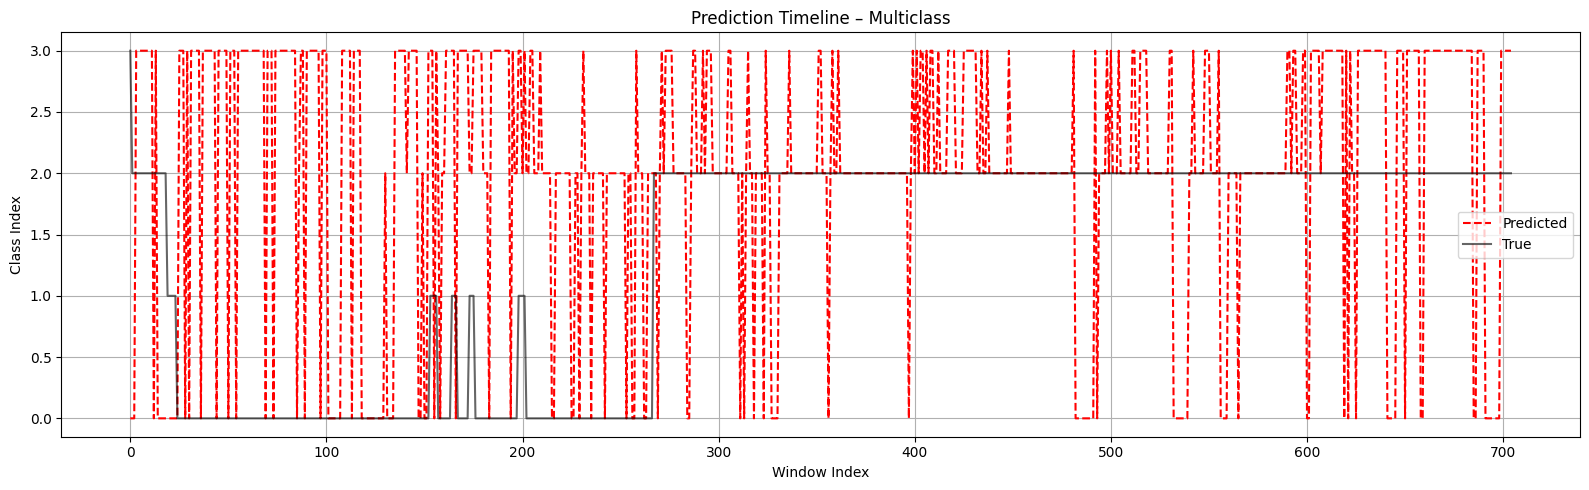

✅ Exported predictions to /content/drive/MyDrive/ML-MTB-Modell/Session_03/prediction_export.csv


In [44]:
import os
import re
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

# ──────────────────────────────────────────────────────────────────────────────
# 1. Mount Google Drive
# ──────────────────────────────────────────────────────────────────────────────
drive.mount('/content/drive', force_remount=True)

# ──────────────────────────────────────────────────────────────────────────────
# 2. Configuration
# ──────────────────────────────────────────────────────────────────────────────
session_folder = "/content/drive/MyDrive/ML-MTB-Modell/Session_03"
timesteps      = 60   # number of frames per window
# we expect exactly 9 features per sensor × 3 sensors = 27 total features
expected_features_per_sensor = 9
total_features = expected_features_per_sensor * 3

# ──────────────────────────────────────────────────────────────────────────────
# 3. Helper: Load and clean one sensor CSV
# ──────────────────────────────────────────────────────────────────────────────
def load_sensor_data(sensor_name):
    """
    Load one sensor CSV, skip the first row (metadata),
    drop the first two columns, ensure only numeric data.
    Returns a DataFrame with exactly 9 feature columns.
    """
    path = os.path.join(session_folder, f"{sensor_name}.csv")
    df = pd.read_csv(path, skiprows=1)
    # Drop the first two columns (e.g. PacketCounter, SampleTimeFine)
    df = df.iloc[:, 2:11]
    # Convert all columns to numeric, coerce errors to NaN, fill NaNs with 0
    df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
    # Verify the expected number of features
    if df.shape[1] != expected_features_per_sensor:
        raise ValueError(
            f"{sensor_name}.csv: expected {expected_features_per_sensor} features, "
            f"but found {df.shape[1]}"
        )
    return df

# ──────────────────────────────────────────────────────────────────────────────
# 4. Load all three sensors and concatenate
# ──────────────────────────────────────────────────────────────────────────────
wrist = load_sensor_data("wrist")
head  = load_sensor_data("head")
seat  = load_sensor_data("seat")

# Verify row counts are equal
n_rows = min(len(wrist), len(head), len(seat))
wrist, head, seat = wrist.iloc[:n_rows], head.iloc[:n_rows], seat.iloc[:n_rows]

# Concatenate horizontally → shape (n_rows, 27)
X_flat = pd.concat([wrist, head, seat], axis=1).values
print("Combined sensor shape:", X_flat.shape)

# ──────────────────────────────────────────────────────────────────────────────
# 5. Compute number of full windows, cut remainder, reshape
# ──────────────────────────────────────────────────────────────────────────────
num_samples = X_flat.shape[0]
num_windows = num_samples // timesteps
cut_length  = num_windows * timesteps

X_cut     = X_flat[:cut_length, :]                   # discard tail
X_session = X_cut.reshape((num_windows, timesteps, total_features))
print("Reshaped for model input:", X_session.shape)

# ──────────────────────────────────────────────────────────────────────────────
# 6. Parse HOT JSON labels into per-frame list
# ──────────────────────────────────────────────────────────────────────────────
def parse_hot_labels(hot_path, total_frames):
    """
    Reads your one-hot JSON file where button_presses is a single string
    like "Resting: 62; Pedaling: 1123; ...". Extracts label/time pairs,
    then fills a list of length total_frames with the correct label
    for each frame.
    """
    with open(hot_path, 'r') as f:
        hot = json.load(f)
    label_string = hot.get("button_presses", "")
    # Extract pairs like ("Resting", 62)
    entries = re.findall(r'([A-Za-z]+):\s*(\d+)', label_string)
    entries = [(lbl, int(idx)) for lbl, idx in entries]
    entries.sort(key=lambda x: x[1])
    # Initialize all frames as "Unknown"
    frame_labels = ["Unknown"] * total_frames
    # Fill in intervals
    for i, (label, start) in enumerate(entries):
        end = entries[i+1][1] if i+1 < len(entries) else total_frames
        for j in range(start, min(end, total_frames)):
            frame_labels[j] = label
    return frame_labels

hot_path     = os.path.join(session_folder, "labels.json")
frame_labels = parse_hot_labels(hot_path, n_rows)
# Cut to same length as X_cut
frame_labels = frame_labels[:cut_length]

# ──────────────────────────────────────────────────────────────────────────────
# 7. Window labels: majority vote per 60-frame block
# ──────────────────────────────────────────────────────────────────────────────
def window_labels(labels, window_size):
    """
    Converts per-frame labels into one label per window
    using majority vote.
    """
    y_win = []
    for i in range(0, len(labels), window_size):
        block = labels[i:i+window_size]
        # If block shorter than window_size (should not happen here), break
        if len(block) < window_size:
            break
        most_common = Counter(block).most_common(1)[0][0]
        y_win.append(most_common)
    return y_win

label_strings = window_labels(frame_labels, timesteps)
if len(label_strings) != num_windows:
    raise ValueError(
        f"Label windows ({len(label_strings)}) != data windows ({num_windows})"
    )

# Encode to numeric
le = LabelEncoder()
y_session_enc = le.fit_transform(label_strings)
print("Classes:", le.classes_)

# ──────────────────────────────────────────────────────────────────────────────
# 8. Load model, predict, plot and export
# ──────────────────────────────────────────────────────────────────────────────
model_path = "/content/drive/MyDrive/ML-MTB-Modell/ML-Model_trained/SenseCap_Model_v42_augment_factor220250607-163310.keras"
model = load_model(model_path)

# Ensure correct dtype
X_session = X_session.astype(np.float32)

# Predict probabilities and classes
y_pred_probs   = model.predict(X_session)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Plot timeline
plt.figure(figsize=(16, 5))
plt.plot(y_pred_classes, label='Predicted', linestyle='--', color='red')
plt.plot(y_session_enc, label='True', alpha=0.6, color='black')
plt.title("Prediction Timeline – Multiclass")
plt.xlabel("Window Index")
plt.ylabel("Class Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Export to CSV
output_csv = os.path.join(session_folder, "prediction_export.csv")
with open(output_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["True_Label","Predicted_Label"])
    for true_lbl, pred_lbl in zip(label_strings, le.inverse_transform(y_pred_classes)):
        writer.writerow([true_lbl, pred_lbl])
print("✅ Exported predictions to", output_csv)


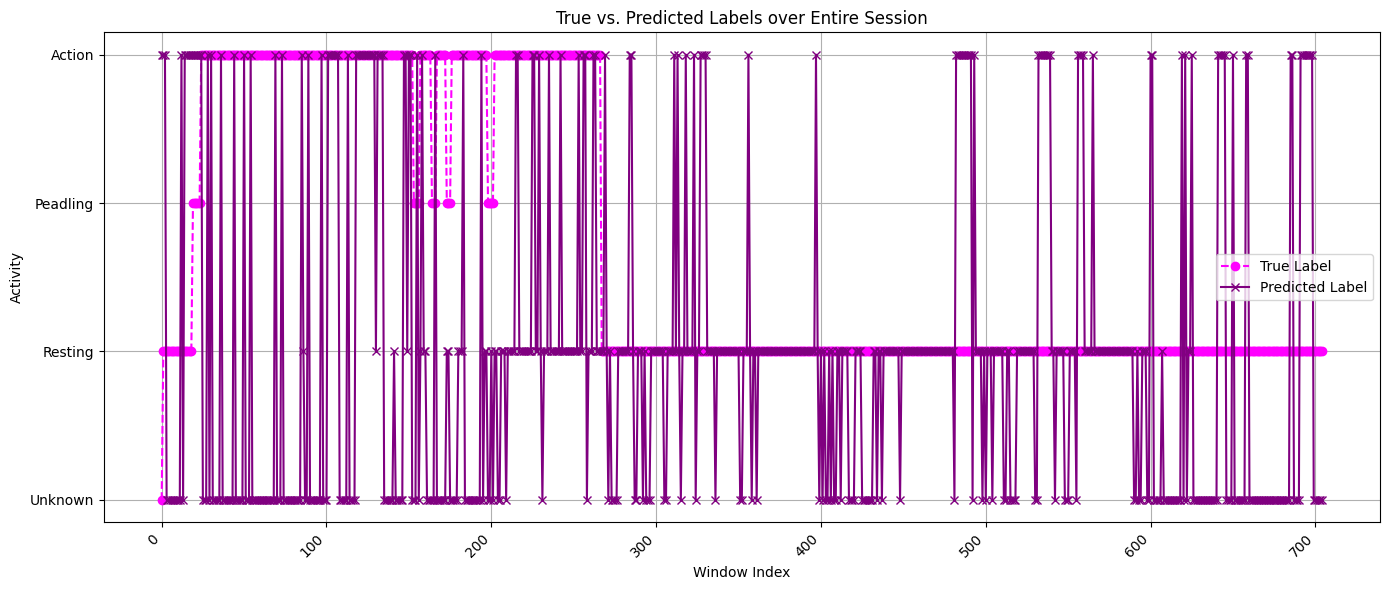

In [60]:
import matplotlib.pyplot as plt

# 1️⃣ Inverse‑transform your full session arrays
true_labels = le.inverse_transform(y_session_enc)
pred_labels = le.inverse_transform(y_pred_classes)

# 2️⃣ Create the plot
plt.figure(figsize=(14, 6))
plt.plot(true_labels, marker='o', linestyle='--', color='magenta', label='True Label')
plt.plot(pred_labels, marker='x', linestyle='-', color='purple', label='Predicted Label')

# 3️⃣ Force y‑axis ticks to your classes in the right order
classes = list(le.classes_)  # e.g. ['Resting','Action','Pushing','Pedaling']
plt.yticks(classes)

# 4️⃣ Finish styling
plt.title('True vs. Predicted Labels over Entire Session')
plt.xlabel('Window Index')
plt.ylabel('Activity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###Data Shape Prints for debugging

In [38]:
print("wrist:", wrist.shape)  # sollte (samples, 9) sein
print("head:", head.shape)    # sollte (samples, 9) sein
print("seat:", seat.shape)    # sollte (samples, 9) sein

wrist: (42305, 10)
head: (42308, 10)
seat: (42307, 10)


In [35]:
print("X_flat shape:", X_flat.shape)


X_flat shape: (42308, 30)


In [34]:
print("X_cut shape:", X_cut.shape)
print("Expected shape:", (num_windows, timesteps, total_features))
print("num_windows * timesteps * total_features =", num_windows * timesteps * total_features)
print("X_cut size:", X_cut.size)


X_cut shape: (42300, 30)
Expected shape: (705, 60, 27)
num_windows * timesteps * total_features = 1142100
X_cut size: 1269000


In [19]:
print("Shape wrist:", wrist.shape)
print("Shape head:", head.shape)
print("Shape seat:", seat.shape)
print("Shape X_flat:", X_flat.shape)
print("Samples:", num_samples)
print("Windows:", num_windows)
print("Cut length:", cut_length)
print("Total values in X_cut:", X_cut.size)
print("Expected total values:", num_windows * timesteps * total_features)


Shape wrist: (42305, 12)
Shape head: (42308, 12)
Shape seat: (42307, 12)
Shape X_flat: (42308, 36)
Samples: 42308
Windows: 705
Cut length: 42300
Total values in X_cut: 1522800
Expected total values: 1142100


In [26]:
import json

hot_path = os.path.join(session_folder, "labels.json")
with open(hot_path, "r") as f:
    hot = json.load(f)

# Zeige die Top-Level-Schlüssel und ein Beispiel
print("Top-Level Keys:", list(hot.keys()))
print(json.dumps(hot, indent=2)[:1000])  # zeige ersten 1000 Zeichen (optional)


Top-Level Keys: ['project_name', 'labeler', 'method', 'classes', 'decision_basis', 'sequence_width', 'button_presses']
{
  "project_name": "0713_0932",
  "labeler": "Lukas",
  "method": "One-hot-encoding",
  "classes": [
    "Action",
    " Resting",
    " Peadling",
    " Pushing"
  ],
  "decision_basis": "Video",
  "sequence_width": "",
  "button_presses": " Resting: 62;  Peadling: 1123; Action: 1464;  Peadling: 9207; Action: 9447;  Peadling: 9845; Action: 10014;  Peadling: 10370; Action: 10548;  Peadling: 11906; Action: 12122; Action: 13162;  Resting: 16006"
}


In [28]:
print("button_presses type:", type(hot["button_presses"]))
print("first 3 entries:", hot["button_presses"][:3])


button_presses type: <class 'str'>
first 3 entries:  Re
